# Clustering - Iris Dataset

### Importing Required Modules

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

### Preview the dataset

In [ ]:
#  This returns a dictionary-like objects
iris = load_iris(as_frame=True)
print(iris.keys()) # Keys of the dataset
list(iris.target_names) # Names of the target classes

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

### Remove labels to convert into an unlabeled dataset

In [ ]:
# Work only with the iris.data (Without the labels)
X = iris.data

### Determining the Optimum Value of k Using the Elbow Method

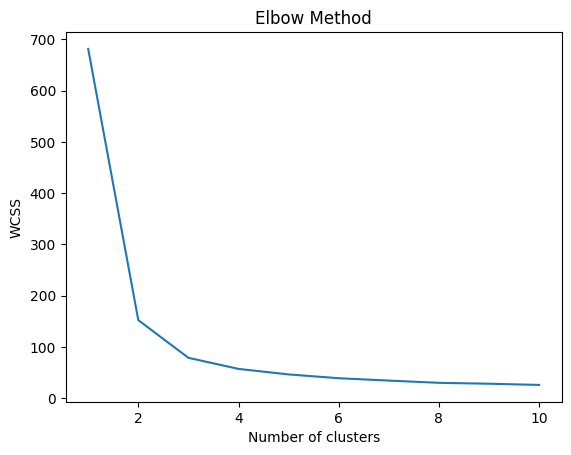

In [ ]:
import matplotlib.pyplot as plt

wcss = [] # w i t h i n cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Actually here we are performing the k means clustering and find the best possible k.
# This is like going backward.
# Do the clustering and find the best k.

### Applying the K-Means Algorithm

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0) # from Elbow method
# random_state=0 This gives the same result in every time we run this
closest_cluster_index = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_

### Visualizing Clusters

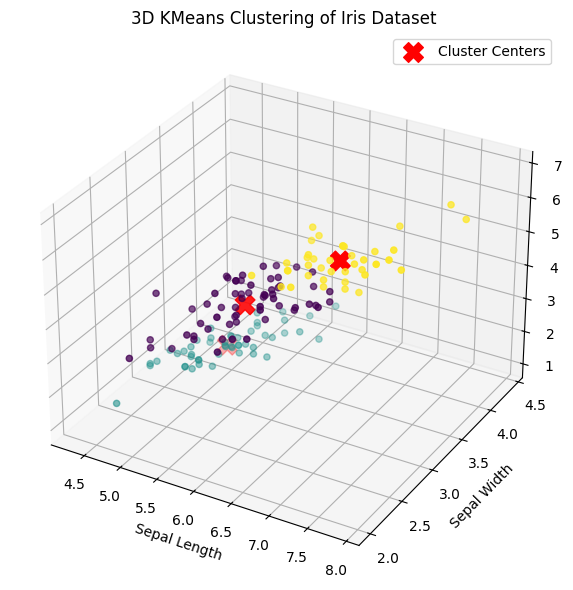

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points colored by cluster assignment

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=closest_cluster_index, cmap='viridis', marker='o')

# Plot cluster centers
# We have clustered using all 4 features, but here it plots only using 3 features
# It is common and acceptable for understanding cluster shape and separation
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2],
           c='red', s=200, marker='X', label='Cluster Centers')

# Axis labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D KMeans Clustering of Iris Dataset')
ax.legend()
plt.tight_layout()
plt.show()

### Visualize the clusters using Sepal Length and Sepal Length

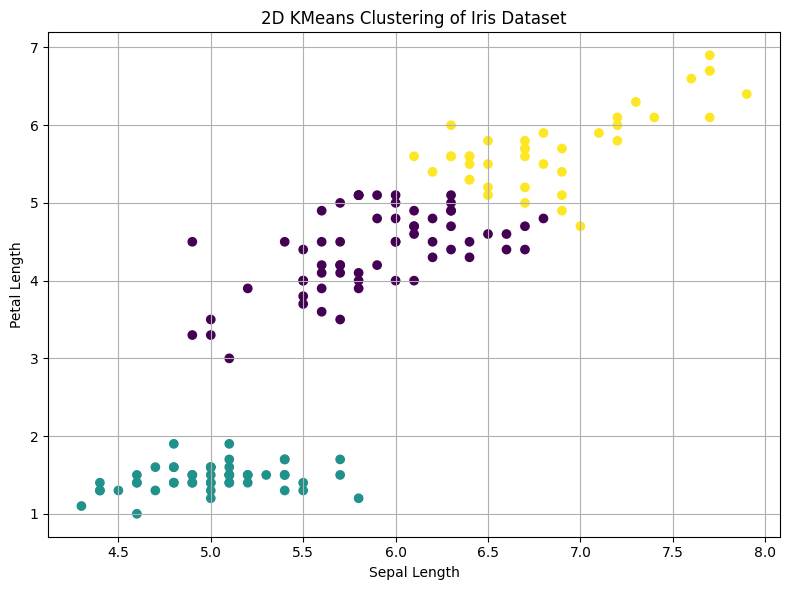

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=closest_cluster_index, cmap='viridis', marker='o')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("2D KMeans Clustering of Iris Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()

### Rerun the algorithm using the selected two features
They are Sepal Length and Sepal Width.

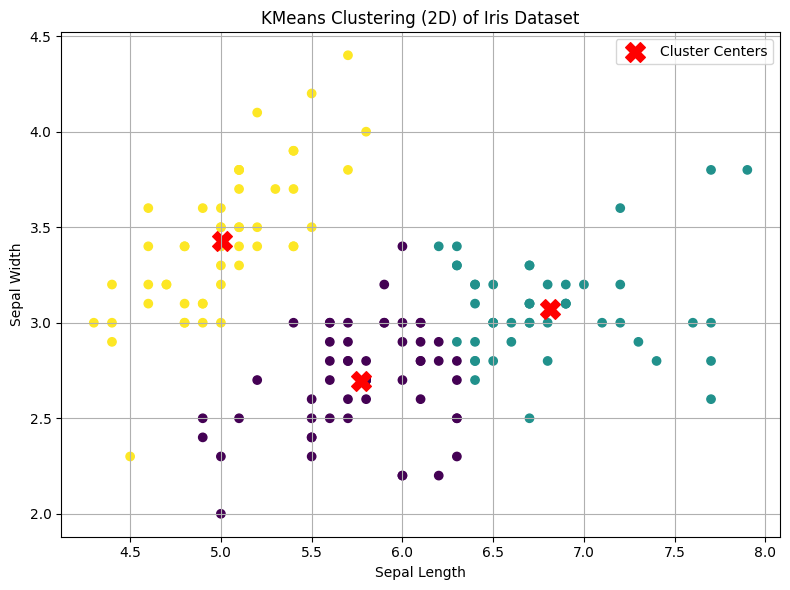

In [ ]:
X_2 = iris.data.iloc[:, :2]  # Take only first two features: sepal length and sepal width

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_2)
centers = kmeans.cluster_centers_

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_2.iloc[:, 0], X_2.iloc[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

# Label axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering (2D) of Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()